**Общая информация**

**Срок сдачи:** 16 марта 2020, 08:30 

**Штраф за опоздание:** по 1 баллу за 24 часа задержки. Через 5 дней домашнее задание сгорает.

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий на почту ml1.sphere@mail.ru с указанием темы в следующем формате:

[ML0220, Задание 1] Фамилия Имя.

Используйте данный Ipython Notebook при оформлении домашнего задания.


**Штрафные баллы:**

1. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw1.ipynb) -0.5 баллов
2. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -0.5 баллов


In [1]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import sklearn
from sklearn import datasets
from sklearn.base import BaseEstimator
from sklearn.datasets import fetch_20newsgroups

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier,KDTree
from sklearn.metrics import accuracy_score
from scipy import stats
from scipy.spatial import distance
import scipy
from sklearn.model_selection import cross_val_score, KFold
from statistics import mean 

/home/ann/.pyenv/versions/3.6.6/lib/python3.6/site-packages/pandas/compat/__init__.py:85: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


##### Задание 1 (1 балл)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. 
Для подсчета расстояний можно использовать функции [отсюда](https://docs.scipy.org/doc/scipy/reference/spatial.distance.html)

In [2]:
class MyKNeighborsClassifier(BaseEstimator):
    
    def __init__(self, n_neighbors, algorithm='brute', metrics = 'euclidean'):
        self.neighbors = n_neighbors
        self.algorithm = algorithm
        self.metrics = metrics
    
    def fit(self, X, y):
        self.x_train = X
        self.y_train = y
    
    def predict(self, X):
        if self.algorithm == 'brute': 
            dist = sklearn.metrics.pairwise.pairwise_distances(X=X, Y=self.x_train, metric=self.metrics)
            predict = self.y_train[np.argsort(dist)[:, :self.neighbors]]
            return stats.mode(predict.T)[0].reshape(-1)
        elif self.algorithm == 'kd_tree':
            tree = KDTree(self.x_train, leaf_size=60)
        dist, ind = tree.query(X, k=self.neighbors)    
        predict = self.y_train[ind].T
        return stats.mode(predict)[0].reshape(-1)

**IRIS**

В библиотеке scikit-learn есть несколько датасетов из коробки. Один из них [Ирисы Фишера](https://ru.wikipedia.org/wiki/%D0%98%D1%80%D0%B8%D1%81%D1%8B_%D0%A4%D0%B8%D1%88%D0%B5%D1%80%D0%B0)

In [3]:
iris = datasets.load_iris()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [5]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='brute')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='brute')

In [6]:
clf.fit(X_train, y_train)
my_clf.fit(X_train, y_train)

In [7]:
sklearn_pred = clf.predict(X_test)
my_clf_pred = my_clf.predict(X_test)
assert abs(accuracy_score(y_test, my_clf_pred) -  accuracy_score(y_test, sklearn_pred ) )<0.005, "Score must be simillar"

**Задание 2 (0.5 балла)**

Давайте попробуем добиться скорости работы на fit, predict сравнимой со sklearn для iris. Допускается замедление не более чем в 2 раза. 
Для этого используем numpy. 

In [8]:
%time clf.fit(X_train, y_train)

CPU times: user 3.5 ms, sys: 0 ns, total: 3.5 ms
Wall time: 2.36 ms


KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [9]:
%time my_clf.fit(X_train, y_train)

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 7.63 µs


In [10]:
%time clf.predict(X_test)

CPU times: user 5.54 ms, sys: 0 ns, total: 5.54 ms
Wall time: 4.6 ms


array([0, 1, 1, 2, 1, 2, 1, 0, 2, 0, 1, 2, 0, 1, 0])

In [11]:
%time my_clf.predict(X_test)

CPU times: user 1.79 ms, sys: 0 ns, total: 1.79 ms
Wall time: 1.28 ms


array([0, 1, 1, 2, 1, 2, 1, 0, 2, 0, 1, 2, 0, 1, 0])

###### Задание 3 (1 балл)
Добавьте algorithm='kd_tree' в реализацию KNN (использовать KDTree из sklearn.neighbors). Необходимо добиться скорости работы на fit,  predict сравнимой со sklearn для iris. Допускается замедление не более чем в 2 раза. 
Для этого используем numpy. Точность не должна уступать значению KNN из sklearn. 

In [12]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')

In [13]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [14]:
%time clf.fit(X_train, y_train)

CPU times: user 3.31 ms, sys: 466 µs, total: 3.77 ms
Wall time: 71 ms


KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [15]:
%time my_clf.fit(X_train, y_train)

CPU times: user 10 µs, sys: 0 ns, total: 10 µs
Wall time: 15.7 µs


In [16]:
%time clf.predict(X_test)

CPU times: user 4.11 ms, sys: 18 µs, total: 4.13 ms
Wall time: 3.15 ms


array([2, 0, 2, 1, 0, 0, 0, 1, 2, 0, 2, 1, 1, 1, 2])

In [17]:
%time my_clf.predict(X_test)

CPU times: user 6.39 ms, sys: 526 µs, total: 6.92 ms
Wall time: 4.96 ms


array([2, 0, 2, 1, 0, 0, 0, 1, 2, 0, 2, 1, 1, 1, 2])

In [18]:
sklearn_pred = clf.predict(X_test)
my_clf_pred = my_clf.predict(X_test)
assert abs( accuracy_score(y_test, my_clf_pred) -  accuracy_score(y_test, sklearn_pred ) )<0.005, "Score must be simillar"

**Задание 4 (2.5 балла)**

Рассмотрим новый датасет 20 newsgroups

In [19]:
import os, ssl
if (not os.environ.get('PYTHONHTTPSVERIFY', '') and
    getattr(ssl, '_create_unverified_context', None)): 
    ssl._create_default_https_context = ssl._create_unverified_context

In [20]:
newsgroups = fetch_20newsgroups(subset='train',remove=['headers','footers', 'quotes'])

In [21]:
data = newsgroups['data']
target = newsgroups['target']

In [22]:
target

array([7, 4, 4, ..., 3, 1, 8])

Преобразуйте текстовые данные из data с помощью [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html). Словарь можно ограничить по частотности.

In [40]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data)

*Так мы получили векторное представление наших текстов. Значит можно приступать к задаче обучения модели*

Реализуйте разбиение выборки для кросс-валидации на 3 фолдах. Разрешено использовать sklearn.cross_validation

In [41]:
kf = KFold(n_splits=3)
for train, test in kf.split(X):
    print("%s %s" % (train, test))
    X_train, X_test, y_train, y_test = X[train], X[test], target[train], target[test]

[ 3772  3773  3774 ... 11311 11312 11313] [   0    1    2 ... 3769 3770 3771]
[    0     1     2 ... 11311 11312 11313] [3772 3773 3774 ... 7540 7541 7542]
[   0    1    2 ... 7540 7541 7542] [ 7543  7544  7545 ... 11311 11312 11313]


Напишите метод, позволяющий найти оптимальное количество ближайших соседей(дающее максимальную точность в среднем на валидации на 3 фолдах).
Постройте график зависимости средней точности от количества соседей. Можно рассмотреть число соседей от 1 до 10.

In [42]:
scores=[]
for k_n in range (1,11):
    my_clf = MyKNeighborsClassifier(n_neighbors=k_n, algorithm='brute')
    score=[]
    for train, test in kf.split(X):
        X_train, X_test, y_train, y_test = X[train], X[test], target[train], target[test]
        my_clf.fit(X_train, y_train)
        score.append(accuracy_score(y_test, my_clf.predict(X_test)))
    #print('{0} neighbour(s)  {1:>10}: {2:.3f}'.format(k_n, 'score', mean(score)))
    scores.append(score)
print('Max score: {0:.3f} with {1} neighbour(s)'.format(max(np.mean(scores, axis = 1)), 1+ np.argmax(np.mean(scores, axis = 1))))

Max score: 0.209 with 1 neighbour(s)


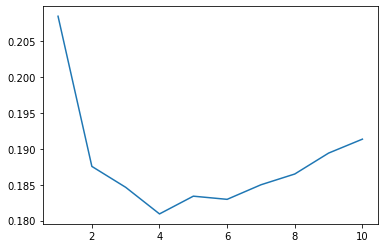

In [43]:
plt.plot(np.arange(1, 11), np.mean(scores, axis = 1))

Как изменится качество на валидации, если:

1. Используется косинусная метрика вместо евклидовой.
2. К текстам применяется TfIdf векторизацию( sklearn.feature_extraction.text.TfidfVectorizer)

Сравните модели, выберите лучшую.

C косинусной метрикой

In [44]:
scores=[]
for k_n in range (1,11):
    my_clf = MyKNeighborsClassifier(n_neighbors=k_n, algorithm='brute', metrics = 'cosine')
    score=[]
    for train, test in kf.split(X):
        X_train, X_test, y_train, y_test = X[train], X[test], target[train], target[test]
        my_clf.fit(X_train, y_train)
        score.append(accuracy_score(y_test, my_clf.predict(X_test)))
    scores.append(score)
print('Max score: {0:.3f} with {1} neighbour(s)'.format(max(np.mean(scores, axis = 1)), 1+ np.argmax(np.mean(scores, axis = 1))))

Max score: 0.292 with 1 neighbour(s)


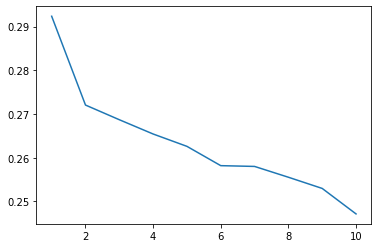

In [45]:
plt.plot(np.arange(1, 11), np.mean(scores, axis = 1))

Применяем TfidfVectorizer

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data)

In [47]:
scores=[]
for k_n in range (1,11):
    my_clf = MyKNeighborsClassifier(n_neighbors=k_n, algorithm='brute')
    score=[]
    for train, test in kf.split(X):
        X_train, X_test, y_train, y_test = X[train], X[test], target[train], target[test]
        my_clf.fit(X_train, y_train)
        score.append(accuracy_score(y_test, my_clf.predict(X_test)))
    scores.append(score)
print('Max score: {0:.3f} with {1} neighbour(s)'.format(max(np.mean(scores, axis = 1)), 1+ np.argmax(np.mean(scores, axis = 1))))

Max score: 0.151 with 1 neighbour(s)


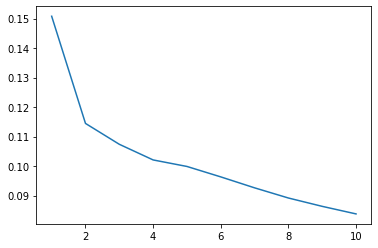

In [48]:
plt.plot(np.arange(1, 11), np.mean(scores, axis = 1))

Применяем TfidfVectorizer и косинусную метрику

In [49]:
scores=[]
for k_n in range (1,11):
    my_clf = MyKNeighborsClassifier(n_neighbors=k_n, algorithm='brute', metrics = 'cosine')
    score=[]
    for train, test in kf.split(X):
        X_train, X_test, y_train, y_test = X[train], X[test], target[train], target[test]
        my_clf.fit(X_train, y_train)
        score.append(accuracy_score(y_test, my_clf.predict(X_test)))
    scores.append(score)
print('Max score: {0:.3f} with {1} neighbour(s)'.format(max(np.mean(scores, axis = 1)), 1+ np.argmax(np.mean(scores, axis = 1))))

Max score: 0.596 with 1 neighbour(s)


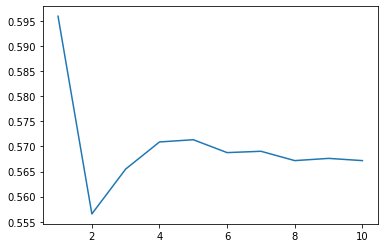

In [50]:
plt.plot(np.arange(1, 11), np.mean(scores, axis = 1))

Таким образом, лучшее качество получается при истользовании косинусной метрики и TfidfVectorizer в одно и то же время.


Загрузим  теперь test  часть нашей выборки и преобразуем её аналогично с train частью. Не забудьте, что наборы слов в train и test части могут отличаться.

In [51]:
test_newsgroups = fetch_20newsgroups(subset='test',remove=['headers','footers', 'quotes'])

Оценим точность вашей лучшей модели на test части датасета. Отличается ли оно от кросс-валидации? Попробуйте сделать выводы, почему отличается качество.

In [52]:
test_data = test_newsgroups['data']
test_target = test_newsgroups['target']

In [53]:
test_X = vectorizer.transform(test_data)

In [54]:
my_clf = MyKNeighborsClassifier(n_neighbors=1, algorithm='brute', metrics = 'cosine')
my_clf.fit(X, target)
print(accuracy_score(test_target, my_clf.predict(test_X)))

0.5088953797132236


На тестовой выборке качество хуже, чем на кросс-валидации, потому что когда мы подбирали оптимальное значение параметра n_neighbors, ориентировались на качество на кросс-валидации. При этом на произвольной выборке (тестовой) оптимальным может быть другое значение n_neighbors. В данном примере - n_neighbors = 8.

In [56]:
scores=[]
for k in range(1,11):
    my_clf = MyKNeighborsClassifier(n_neighbors=k, algorithm='brute', metrics = 'cosine')
    my_clf.fit(X, target)
    scores.append(accuracy_score(test_target, my_clf.predict(test_X))) 

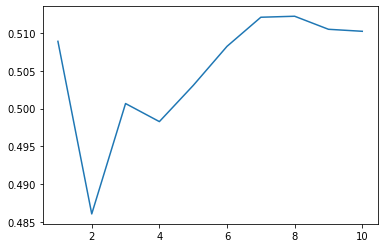

In [58]:
plt.plot(np.arange(1, 11), scores)

Во встроенной библиотеке sklearn

In [55]:
clf = KNeighborsClassifier(n_neighbors=1, algorithm='brute', metric='cosine')
clf.fit(X, target)
accuracy_score(test_target, clf.predict(test_X))

0.5088953797132236